In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
from scipy.io import loadmat
from cmocean import cm
import warnings
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools, places

#import LambertConformalTicks as lct
import pickle
%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

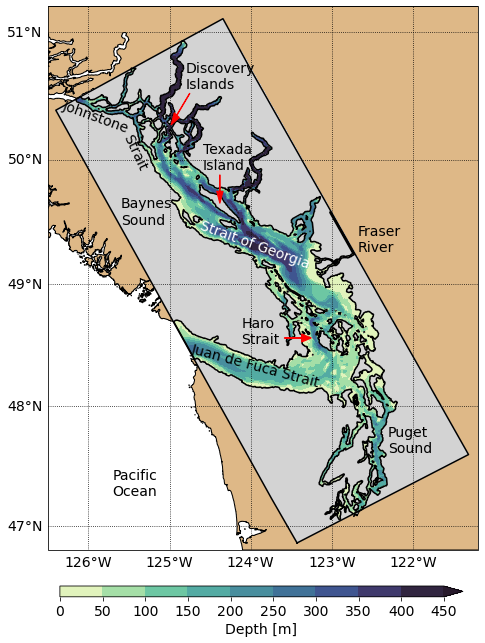

In [3]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')

# Make plot area
xlim, ylim = [-126.5, -121.2], [46.8, 51.2]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

# Overlay bathymetry
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, grid.Bathymetry, levels=np.arange(0, 451, 50),
    cmap=cm.deep, extend='max', transform=crs.PlateCarree(), zorder=2,
)

# Overlay domain landmask and coastline
for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
    )

# Draw box around domain
lons, lats = [], []
corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Add annotations
ax.text(0.15, 0.1, 'Pacific\nOcean', transform=ax.transAxes)
ax.text(0.79, 0.18, 'Puget\nSound', transform=ax.transAxes)
ax.text(0.33, 0.30, 'Juan de Fuca Strait', transform=ax.transAxes, rotation=-15)
ax.text(0.35, 0.52, 'Strait of Georgia', transform=ax.transAxes, rotation=-20, color='w')
ax.text(0.03, 0.77, 'Johnstone', transform=ax.transAxes, rotation=-20)
ax.text(0.17, 0.70, 'Strait', transform=ax.transAxes, rotation=-65)
ax.text(0.45, 0.38, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.17, 0.6, 'Baynes\nSound', transform=ax.transAxes)
ax.text(0.32, 0.85, 'Discovery\nIslands', transform=ax.transAxes)
ax.text(0.36, 0.7, 'Texada\nIsland', transform=ax.transAxes)
ax.text(0.72, 0.55, 'Fraser\nRiver', transform=ax.transAxes)
ax.arrow(0.55, 0.39, 0.04, 0, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)
ax.arrow(0.4, 0.69, 0, -0.03, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)
ax.arrow(0.33, 0.84, -0.03, -0.04, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)

# Colorbar
cax = fig.add_axes([0.16, 0.06, 0.7, 0.015])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Depth [m]')

# Save figure
#fig.savefig('/home/bmoorema/Desktop/SSC_domain.pdf', bbox_inches='tight')




## to ben's working map add necessary 

In [4]:
BR3_sal_summer = pickle.load(open('../pkls/BR3_sal_summer_mean.pkl', 'rb')) 

In [5]:
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')

nav_lon = (grid['nav_lon'][:])
nav_lat = (grid['nav_lat'][:])
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


xs_list = [jdf_x, jdf2_x, jdf3_x,cs_x, cs2_x, cs3_x,haro_x, haro2_x, haro3_x,ns_x, ns2_x, ns3_x]
ys_list = [jdf_y, jdf2_y, jdf3_y,cs_y, cs2_y, cs3_y,haro_y, haro2_y, haro3_y,ns_y, ns2_y, ns3_y]
cols_list = ['teal', 'mediumaquamarine',  'lightseagreen',  'royalblue', 'navy',\
 'dodgerblue', 'tomato','firebrick','indianred',  'olive', 'yellowgreen', 'palegoldenrod']

for i in range(0, len(xs_list)):
    tx = xs_list[i]; ty = ys_list[i]
    tlon = nav_lon[ty,tx]; tlat = nav_lat[ty,tx]
#     print(tlon)
#     print(tlat)


<xarray.DataArray 'nav_lon' ()>
array(-124.038544)
Attributes:
    units:      degrees_east
    long_name:  longitude
<xarray.DataArray 'nav_lat' ()>
array(48.301903)
Attributes:
    units:      degrees_north
    long_name:  latitude
<xarray.DataArray 'nav_lon' ()>
array(-124.369896)
Attributes:
    units:      degrees_east
    long_name:  longitude
<xarray.DataArray 'nav_lat' ()>
array(48.41254)
Attributes:
    units:      degrees_north
    long_name:  latitude
<xarray.DataArray 'nav_lon' ()>
array(-123.688538)
Attributes:
    units:      degrees_east
    long_name:  longitude
<xarray.DataArray 'nav_lat' ()>
array(48.250572)
Attributes:
    units:      degrees_north
    long_name:  latitude
<xarray.DataArray 'nav_lon' ()>
array(-123.766502)
Attributes:
    units:      degrees_east
    long_name:  longitude
<xarray.DataArray 'nav_lat' ()>
array(49.308731)
Attributes:
    units:      degrees_north
    long_name:  latitude
<xarray.DataArray 'nav_lon' ()>
array(-123.40979)
Attributes:
   

In [10]:
def plot_thalweg(ax, T_lon, T_lat):
    lines = np.loadtxt('/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
    lines = lines.astype(int)

    thalweg_lon = T_lon[lines[:,0],lines[:,1]]
    thalweg_lat = T_lat[lines[:,0],lines[:,1]]
    ax.plot(thalweg_lon, thalweg_lat, 'r', transform=crs.Geodetic())

In [21]:
lines = np.loadtxt('/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
lines = lines.astype(int)
thal_lon = np.zeros(1533)
thal_lat = np.zeros(1533)

for i in range(0,len(thal_lon)):
    ty = lines[i,0]
    tx = lines[i,1]
    thal_lon[i] = (nav_lon[ty,tx])
    thal_lat[i] = (nav_lat[ty,tx])
    
# print(np.shape(lines))
# print(lines[0,1])

In [22]:
thal_lon

array([-124.73873138, -124.73355103, -124.72837067, ..., -126.12310028,
       -126.12631226, -126.1295166 ])

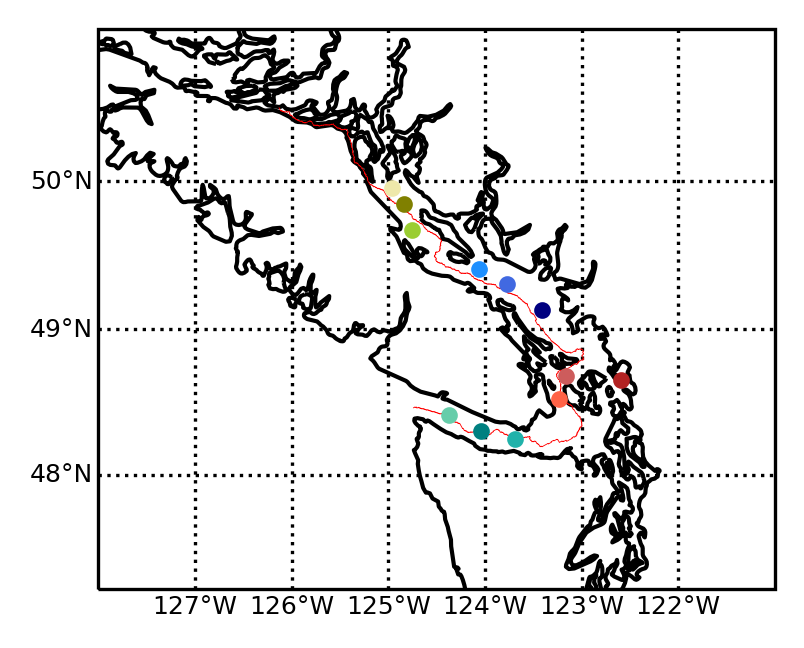

In [25]:
# Increase font size
plt.rcParams['font.size'] = 6
ms = 3
# Load grid and mask files

# Make plot area

fig = plt.figure(figsize=(10/2.54, 9/2.54),dpi = 300)
gs = fig.add_gridspec(4, 4)

xlim, ylim = [-128, -121], [47.2, 51.0]

#central_longitude=0.0, min_latitude=-80.0, max_latitude=84.0
#projection=crs.Mercator(np.mean(xlim), *ylim))
ax = fig.add_subplot(gs[0:3, 0:3], projection=crs.Mercator(central_longitude=-124))
ax.set_extent([-128, -121, 47.2, 51.0], crs=crs.PlateCarree())

# Draw coastline
ax.coastlines()
#ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

# tdat_p = BR3_sal_summer[0,:,:]
# # Overlay bathymetry
# c = ax.contourf(
#     grid.nav_lon, grid.nav_lat, tdat_p, levels=np.arange(0, 33.0, 0.25), 
#     cmap=cm.haline, extend = 'both', transform=crs.PlateCarree(), zorder=2,
# )

#Overlay domain landmask and coastline
# for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
#     getattr(ax, attr)(
#         grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
#         levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
#     )

# # Draw box around domain
# lons, lats = [], []
# corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
# for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
# ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

#ax.plot(-124,50, marker = 'o', markersize = 68, color = 'teal', zorder = 10)

ax.plot(thal_lon, thal_lat, 'r', linewidth = 0.2, transform=crs.Geodetic())

for i in range(0, len(xs_list)):
    tx = xs_list[i]; ty = ys_list[i]
    tlon = nav_lon[ty,tx]; tlat = nav_lat[ty,tx]
#     print(tlon)
#     print(tlat)
    w =ax.plot(tlon,tlat,marker = 'o', color = cols_list[i], markersize=ms, transform=crs.Geodetic())
#ax.plot(-124,50, 'bo', markersize=7, transform=ccrs.Geodetic())


# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# cax = fig.add_axes([0.7, 0.30, 0.015, 0.6])
# tticks = [0,2.5,5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30,32.5]
# fig.colorbar(w, cax=cax, orientation='vertical', label='Depth [m]', ticks = tticks)

# Save figure
#fig.savefig('/home/bmoorema/Desktop/SSC_domain.pdf', bbox_inches='tight')




In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Create Mercator projection with dateline in the middle:
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180))
# Draw coastlines so we know where we are:
ax.coastlines()
# Set the map extent, making sure to specify the correct coordinate system
# for geographical coordinates:
ax.plot()
ax.set_extent([90, 270, -40, 40], crs=ccrs.PlateCarree())
plt.show()